Have a couple paragraphs about physics going on, what are we looking for
LHC looking for Higgs-Boson stuff
Read the papers, abstract, pull stuff from those places
Don't need to go into crazy detail

Focus more on understanding 'hardware', understanding where data is coming from
Make some plots, explain what's going on with them and what they represent
Up to us about how much we want to do, but the more we do the better

For today, let's get bugs ironed out of the data

HERA data
I picked the first dataset

Elijah Burns <br/>
Phys 434 <br/>
Lab 5

In [41]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from pyuvdata import UVData

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [42]:
hf = h5py.File('hera_data.uvh5', 'r')
hf.keys()

<KeysViewHDF5 ['Data', 'Header']>

In [43]:
data = np.array(hf.get('Data'))
print(data)

['flags' 'nsamples' 'visdata']


In [44]:
hf.close()

In [45]:
uv = UVData()
uv.read('hera_data.uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


In [46]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 14
antenna2 = 14
data = uv.get_data(antenna1,antenna2)
print(len(abs(data[5])))

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]
1536


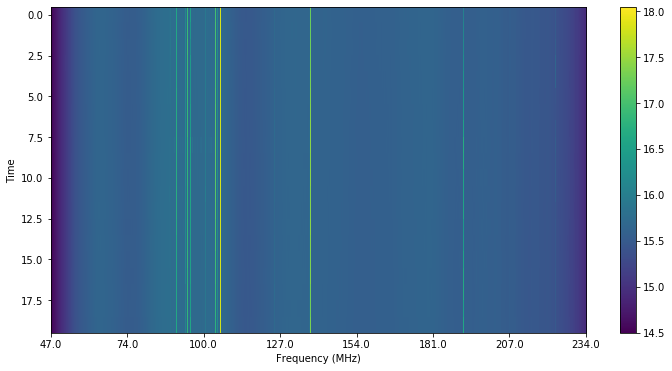

In [77]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.log(np.abs(data)),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)

In [48]:
print(uv.get_antpairs())

[(1, 1), (1, 14), (1, 23), (1, 26), (1, 36), (1, 50), (1, 53), (1, 58), (1, 59), (1, 65), (1, 66), (1, 68), (1, 75), (1, 82), (1, 83), (1, 84), (1, 85), (1, 90), (1, 91), (1, 93), (1, 98), (1, 99), (1, 100), (1, 102), (1, 104), (1, 117), (1, 118), (1, 120), (1, 122), (1, 124), (1, 135), (1, 140), (1, 141), (1, 142), (1, 176), (2, 1), (2, 2), (2, 14), (2, 23), (2, 26), (2, 36), (2, 50), (2, 53), (2, 58), (2, 59), (2, 65), (2, 66), (2, 68), (2, 75), (2, 82), (2, 83), (2, 84), (2, 85), (2, 90), (2, 91), (2, 93), (2, 98), (2, 99), (2, 100), (2, 102), (2, 104), (2, 117), (2, 118), (2, 120), (2, 122), (2, 124), (2, 135), (2, 140), (2, 141), (2, 142), (2, 176), (14, 14), (14, 23), (14, 26), (14, 36), (14, 50), (14, 53), (14, 58), (14, 59), (14, 65), (14, 66), (14, 68), (14, 75), (14, 82), (14, 83), (14, 84), (14, 85), (14, 90), (14, 91), (14, 93), (14, 98), (14, 99), (14, 100), (14, 102), (14, 104), (14, 117), (14, 118), (14, 120), (14, 122), (14, 124), (14, 135), (14, 140), (14, 141), (14, 1

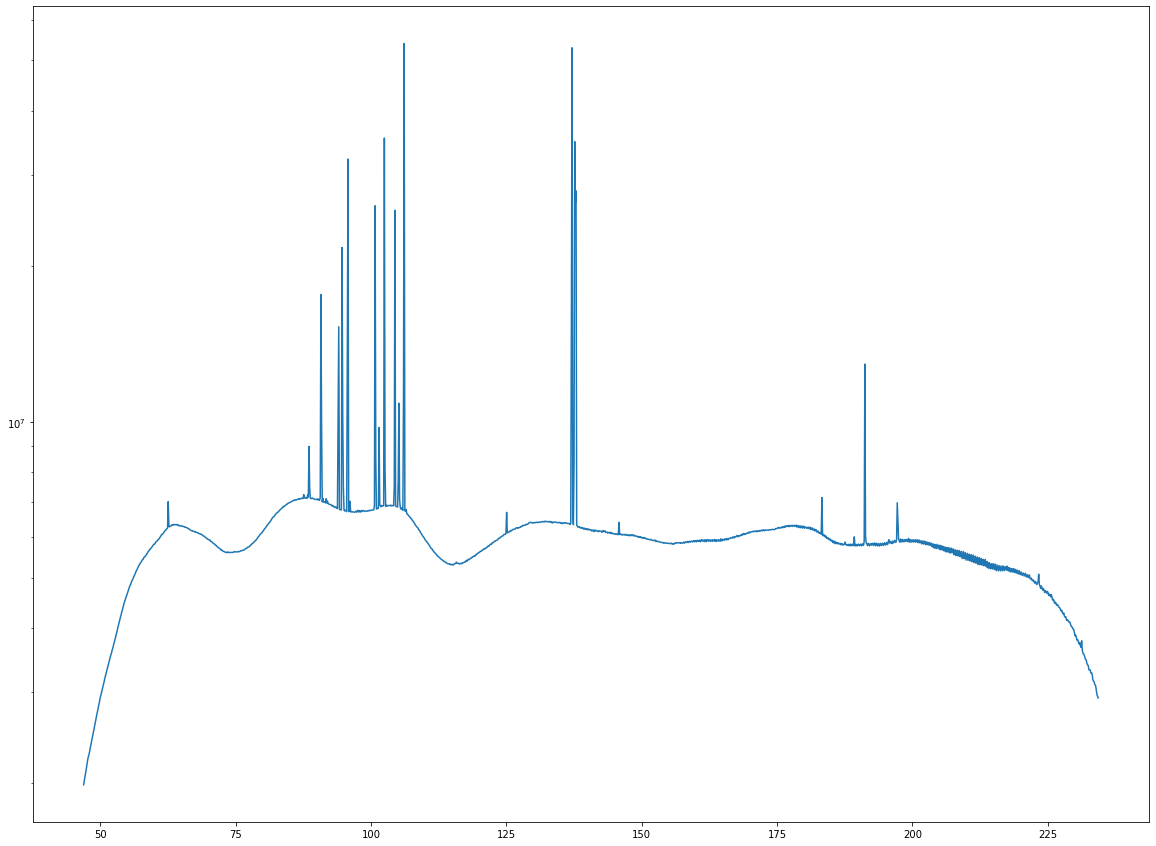

In [49]:
data = abs(data)
plt.plot(freqs,data[5])
plt.yscale('log')
plt.show()

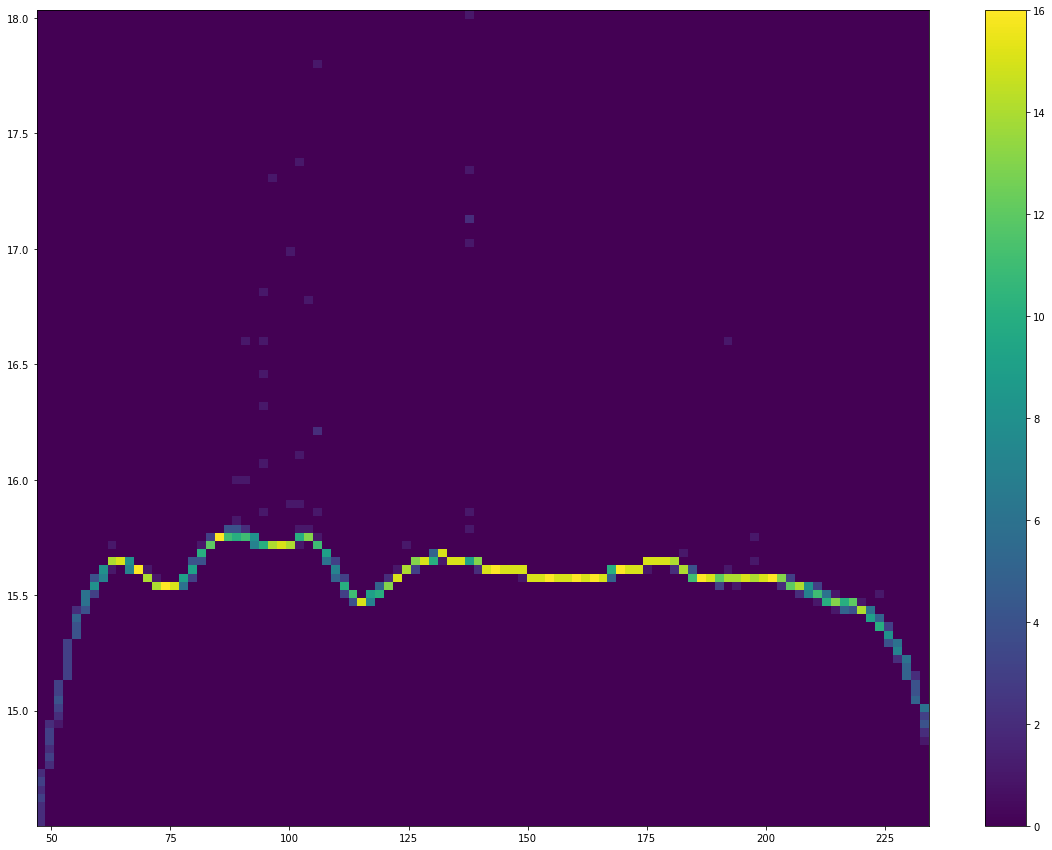

In [76]:
for i in range(20):
    plt.hist2d(freqs,np.log(data[i]), bins = 100)
#plt.yscale('log')
plt.colorbar()
plt.show()

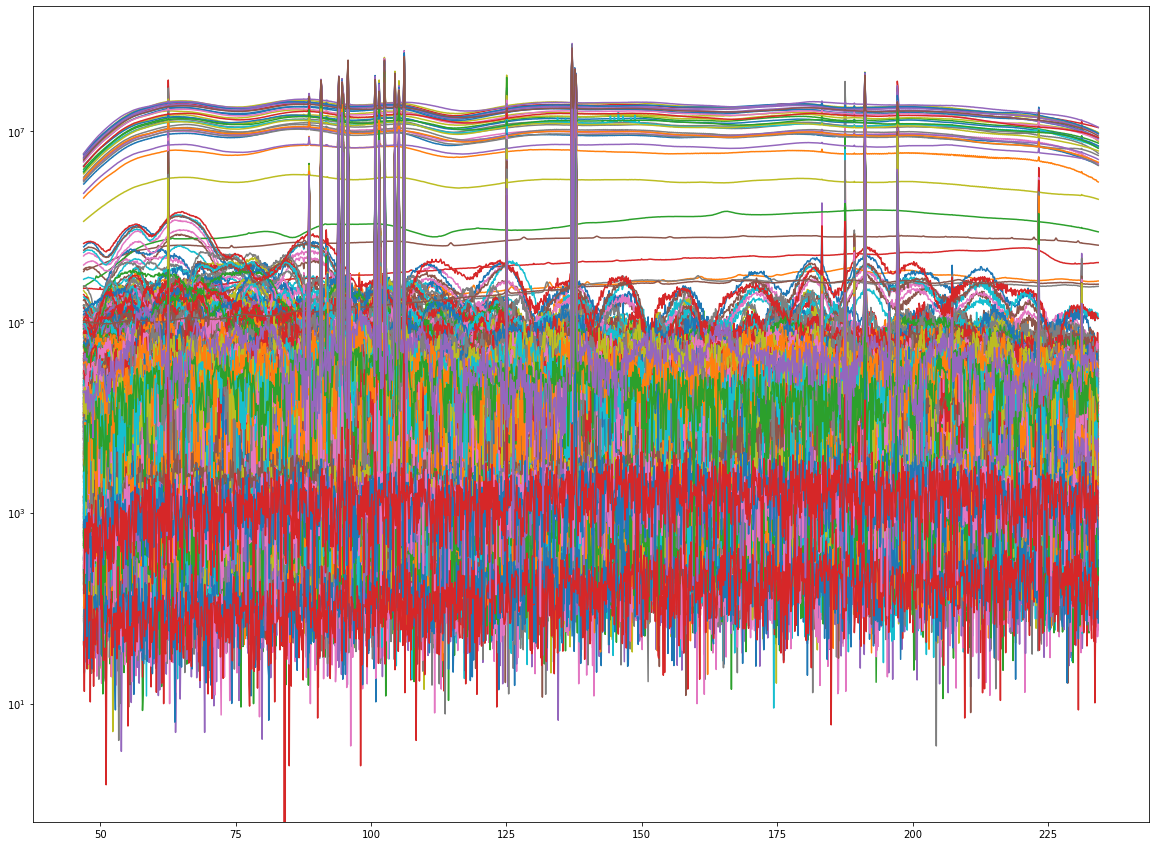

In [83]:
pairs = uv.get_antpairs()
pairs[0][1]

for i in range(666):
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    dat = abs(uv.get_data(ant1,ant2))
    plt.plot(freqs,dat[19])
    plt.yscale('log')


In [81]:
times = uv.get_times(1,2)
print(len(times))

20
